# Cupoy官網新聞




# TARGET 1
透過開發者⼯工具觀察網站在列列出 News Feed 這邊是屬於動態網站還是靜態網站，或是有 API 可以直接送 requests

# TARGET 2
根據網站特性選擇 requests / BeautifulSoup / selenium 等⼯工具進⾏行行爬蟲整理理

# TARGET 3
整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

In [3]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 以科技新聞為例，先連結到科技新聞網頁，複製其URL。

In [4]:
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  #科技新聞

### 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

In [10]:
browser = webdriver.Chrome(executable_path='C:/Users/User/Desktop/chromedriver/chromedriver.exe')
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy科技網頁
time.sleep(5)

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
max_count = 100
categorylist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= max_count) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、內容、來源、網址抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        href = artical.find("a").get('href')
        
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            hreflist.append(href)
            # count表文章爬到的數目
            count += 1
        
        # 停止條件，抓到500篇文章即終止程式
        if count == (max_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.close()

In [11]:
# 整理資料後顯示
from pandas import DataFrame
columnName = ['category','title','content','href']

data = DataFrame([categorylist, titlelist, contentlist, hreflist])
data = data.T
data.columns = columnName
data

,category,title,content,href
0,Fintech金融科技,底價 7 億總投資近百，三立拿下林口媒體園區 C、D 地上權 - INSIDE,"這次招標的Ｃ、Ｄ基地面積達13,248坪，只有三立影城一家廠商出手，據瞭解，在規劃方面，三立...",https://www.inside.com.tw/article/19302-set
1,Fintech金融科技,疫情致網路流量大增！臉書跟進調降歐洲地區串流畫質 - INSIDE,尼爾森表示，在疫情影響之下，民眾待在家的時間越久，使用 Netflix、YouTube、Di...,https://www.inside.com.tw/article/19300-Facebo...
2,Fintech金融科技,國際奧委：2020 東京奧運確定「延期舉辦」 - INSIDE,國際奧委會委員宣佈奧運確定延期。經濟學家估計可能造成損失高達 7000 億日圓。 標籤: 2...,https://www.inside.com.tw/article/19301-olympi...
3,蘋果專區,Dell 弄了一個讓 iPhone 與 PC 互傳相片的工具,Dell 曾表示會讓 Mobile Connect 工具增加對 iPhone 的支援，今天這...,https://chinese.engadget.com/chinese-2020-03-2...
4,資訊安全,微軟警告 Windows 的字形系統有兩個漏洞，已經有被攻擊的案例,稍早微軟警告所有的 Windows 用戶，在其字形管理系統中有一個漏洞，可能允許惡意人士控制...,https://chinese.engadget.com/chinese-2020-03-2...
...,...,...,...,...
95,職涯,說支持社運但遊行都不去，態度怎樣才會影響行為？ - The News Lens 關鍵評論網,口說一套，做就另一套並不一定等同於偽善，這是一種常見於人類的行為模式，但怎樣才能言行一致？,https://www.thenewslens.com/article/132838
96,職涯,港媒：中國「無症狀」感染者不屬於「確診」，確診統計少列4萬人 - The News Lens...,香港英文報刊《南華早報》報導，截至2月底，中國境內超過4萬3000人檢測武漢肺炎呈陽性反應，...,https://www.thenewslens.com/article/132833
97,3C產品,Acer ConceptD CP7 (CP7271KP) 專業顯示器開箱：4K UHD 細膩...,Acer ConceptD CP7（CP727KP）提供內容創作者更具專業性的顯示器選擇，除...,https://www.techbang.com/posts/76690-acer-conc...
98,Fintech金融科技,《精油日常》：「茴香」適合身體變化的女性，從經前症候羣到產後憂鬱都適用 - The News...,茴香精油是以種子蒸餾取得，呈鮮黃色液體，藥草氣息濃厚，香料精油針對腸胃系統，效用一向聲譽卓著...,https://www.thenewslens.com/article/132158


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
0    24 non-null object
1    24 non-null int64
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes
None


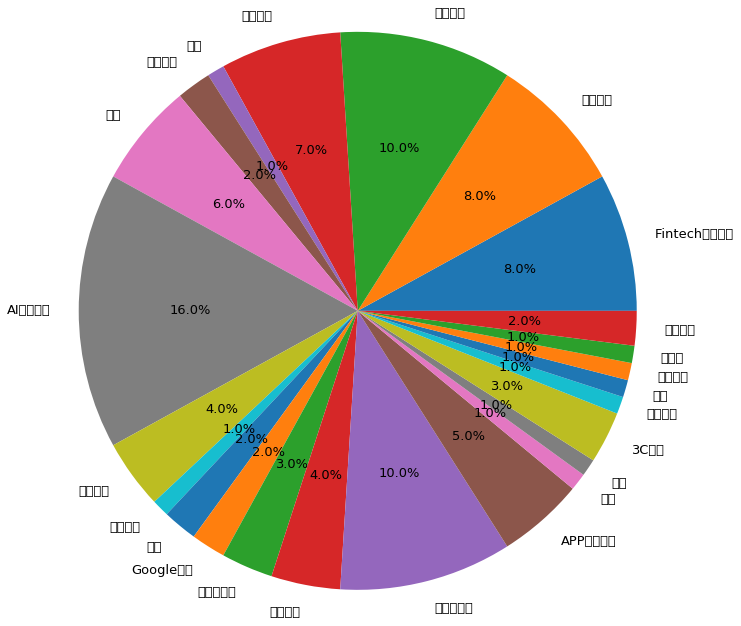

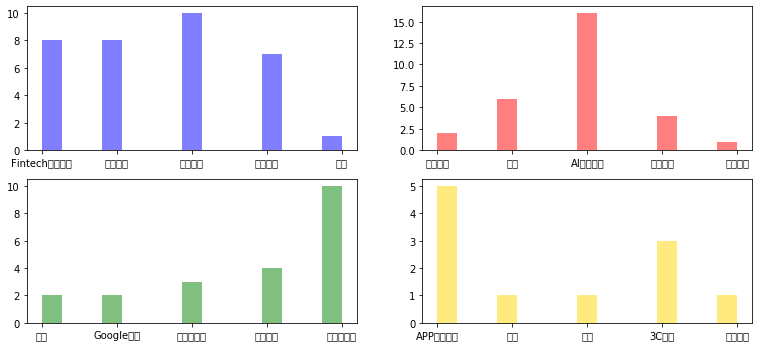

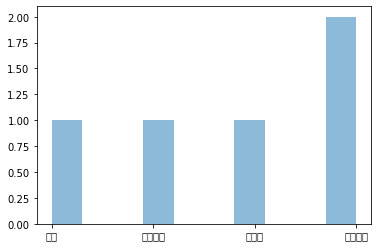

In [19]:
# 用Counter計算種類後排序顯示
from collections import Counter
import matplotlib.pyplot as plt

sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()